# House Price Prediction

### Importing Necessary Libraries

In this cell, we import the libraries required for our house price prediction system:

- `numpy`: Used for numerical computations and handling arrays.
- `matplotlib.pyplot`: Used for data visualization, such as plotting graphs and charts.
- `pandas`: Used for data manipulation and analysis, including reading and processing data from various sources.
- `warnings`: Used to manage and filter warnings in the code. Here, we use it to ignore warnings for a cleaner output.


In [3]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import pandas as pd  # For data manipulation and analysis
import warnings  # To handle warnings

warnings.filterwarnings('ignore')  # Ignore warnings for clean output

### Loading the Dataset

In this cell, we load the datasets required for training and testing our house price prediction model:

- `train.csv`: The training dataset, which contains historical data on house prices along with their features.
- `test.csv`: The testing dataset, which contains data that we will use to evaluate the performance of our model.

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Previewing the Training Dataset

In this cell, we display the first three rows of the training dataset using the `head()` method.

In [5]:
# Displaying the first three rows of the training dataset
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Dataset Information

In this cell, we display information about the training dataset using the `info()` method:

- `train.info()`: This method provides a concise summary of the DataFrame, including the number of non-null entries, data types of each column, and memory usage. It is useful for understanding the structure of the dataset, identifying missing values, and getting an overall sense of the data.


In [6]:
# Displaying information about the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Statistical Summary of the Training Dataset

In this cell, we display a statistical summary of the training dataset using the `describe()` method:

- `train.describe()`: This method generates descriptive statistics for the numerical columns in the DataFrame, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. It provides a quick overview of the distribution and variability of the data.


In [7]:
# Displaying statistical summary of the training dataset
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Selecting Relevant Columns

In this cell, we select and subset the relevant columns from the training and testing datasets:

- We create a list of `relevant_columns` that includes features we deem important for predicting house prices.
- For the training dataset, we include the `SalePrice` column, which is the target variable we aim to predict.
- We subset the `train` DataFrame to include only these relevant columns.
- We display the first few rows of the modified training dataset to confirm our selection.

Similarly, for the testing dataset:
- We create a list of relevant columns, excluding the `SalePrice` column.
- We subset the `test` DataFrame to include only these relevant columns.
- We display the first few rows of the modified testing dataset to confirm our selection.

By focusing on the most relevant features, we aim to build a more effective and interpretable predictive model.


In [8]:
# Importing the pandas library
import pandas as pd  

# Select the relevant columns from the training dataset
relevant_columns = [
    'GrLivArea', '1stFlrSF', '2ndFlrSF', 'LotArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd',
    'SalePrice'
]

# Subset the training dataset to include only the relevant columns
train = train[relevant_columns]

# Display the first few rows of the modified training dataset to confirm the selection
print(train.head())

# Select the relevant columns from the testing dataset (excluding the target variable)
relevant_columns = [
    'GrLivArea', '1stFlrSF', '2ndFlrSF', 'LotArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd'
]

# Subset the testing dataset to include only the relevant columns
test = test[relevant_columns]

# Display the first few rows of the modified testing dataset to confirm the selection
print(test.head())


   GrLivArea  1stFlrSF  2ndFlrSF  LotArea  BsmtFullBath  BsmtHalfBath  \
0       1710       856       854     8450             1             0   
1       1262      1262         0     9600             0             1   
2       1786       920       866    11250             1             0   
3       1717       961       756     9550             1             0   
4       2198      1145      1053    14260             1             0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  SalePrice  
0         2         1             3             8     208500  
1         2         0             3             6     181500  
2         2         1             3             6     223500  
3         1         0             3             7     140000  
4         2         1             4             9     250000  
   GrLivArea  1stFlrSF  2ndFlrSF  LotArea  BsmtFullBath  BsmtHalfBath  \
0        896       896         0    11622           0.0           0.0   
1       1329      1329         0    1

### Removing null values

In [9]:
# Check for missing values in the training & testing dataset
print(train.isnull().sum())
print(test.isnull().sum())

# Fill missing values in the training & testing dataset with the column mean
test.fillna(test.mean(), inplace=True)  
train.fillna(train.mean(), inplace=True)

# Confirm that there are no more missing values in the training & testing dataset
print(train.isnull().sum())
print(test.isnull().sum())

GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64


### Handling Missing Values

In this cell, we check for and handle missing values in the training and testing datasets:

- We use `train.isnull().sum()` and `test.isnull().sum()` to print the number of missing values in each column of the training and testing DataFrames, respectively. This helps us identify columns with missing data.
- We handle missing values by filling them with the mean value of their respective columns using the `fillna()` method. Specifically:
  - `test.fillna(test.mean(), inplace=True)`: This replaces missing values in the testing dataset with the mean of each column.
  - `train.fillna(train.mean(), inplace=True)`: This replaces missing values in the training dataset with the mean of each column.
- We confirm that there are no more missing values by printing the number of missing values in each column again after filling them.

Handling missing values is crucial for building a robust predictive model, as many machine learning algorithms do not handle missing data natively.


In [11]:
# Check for duplicate rows in the training & testing dataset
print(train.duplicated().sum())
print(test.duplicated().sum())

# Remove duplicate rows from the training & testing dataset
test.drop_duplicates(inplace=True)
train.drop_duplicates(inplace=True)

# Confirm that there are no more duplicate rows in the training & testing dataset
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0
0
0


### Feature Engineering

In this cell, we perform feature engineering by creating new columns in both the training and testing datasets:

- **Total Area**: We assume that `GrLivArea` represents the total area of the house and create a new column `Area` in both datasets using this value.
- **Total Bathrooms**: We calculate the total number of bathrooms by summing up `FullBath`, `HalfBath`, `BsmtFullBath`, and `BsmtHalfBath`. This sum is stored in a new column `TotalBathrooms`.
- **Total Bedrooms**: We use `TotRmsAbvGrd` as the total number of bedrooms and store this value in a new column `TotalBedrooms`.

We then display the first few rows of the modified datasets to confirm the addition of these new features. These new columns will help provide more comprehensive information for the house price prediction model.


In [12]:
# Calculate total area in the training dataset
train['Area'] = train['GrLivArea']

# Calculate total bathrooms in the training dataset (sum of FullBath and HalfBath)
train['TotalBathrooms'] = train['FullBath'] + train['HalfBath'] + train['BsmtFullBath'] + train['BsmtHalfBath']

# Calculate total bedrooms in the training dataset
train['TotalBedrooms'] = train['TotRmsAbvGrd']

# Display the first few rows of the modified training dataset to confirm the new columns
print(train.head())


# Calculate total area in the testing dataset (assuming GrLivArea represents total area)
test['Area'] = test['GrLivArea']

# Calculate total bathrooms in the testing dataset (sum of FullBath and HalfBath)
test['TotalBathrooms'] = test['FullBath'] + test['HalfBath'] + test['BsmtFullBath'] + test['BsmtHalfBath']

# Calculate total bedrooms in the testing dataset
test['TotalBedrooms'] = test['TotRmsAbvGrd']

# Display the first few rows of the modified testing dataset to confirm the new columns
print(test.head())


   GrLivArea  1stFlrSF  2ndFlrSF  LotArea  BsmtFullBath  BsmtHalfBath  \
0       1710       856       854     8450             1             0   
1       1262      1262         0     9600             0             1   
2       1786       920       866    11250             1             0   
3       1717       961       756     9550             1             0   
4       2198      1145      1053    14260             1             0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  SalePrice  Area  \
0         2         1             3             8     208500  1710   
1         2         0             3             6     181500  1262   
2         2         1             3             6     223500  1786   
3         1         0             3             7     140000  1717   
4         2         1             4             9     250000  2198   

   TotalBathrooms  TotalBedrooms  
0               4              8  
1               3              6  
2               4              6  


### Selecting Relevant Columns for Modeling

In this cell, we refine the datasets by selecting only the relevant columns for training and prediction:

- **Training Dataset**: We retain the columns `Area`, `TotalBathrooms`, `TotalBedrooms`, and `SalePrice`. The `SalePrice` column is included as it is the target variable we want to predict.
- **Testing Dataset**: We retain the columns `Area`, `TotalBathrooms`, and `TotalBedrooms`. The `SalePrice` column is not included in the testing dataset as it is not available during prediction.

We display the first few rows of both the training and testing datasets to verify that the column selection has been applied correctly. These selections will streamline our model training and prediction processes.


In [13]:
# Select relevant columns from the training dataset for model training
train = train[['Area', 'TotalBathrooms', 'TotalBedrooms', 'SalePrice']]
# Display the first few rows of the modified training dataset to confirm the selection
print(train.head())


# Select relevant columns from the testing dataset for model prediction
test = test[['Area', 'TotalBathrooms', 'TotalBedrooms']]
# Display the first few rows of the modified testing dataset to confirm the selection
print(test.head())

   Area  TotalBathrooms  TotalBedrooms  SalePrice
0  1710               4              8     208500
1  1262               3              6     181500
2  1786               4              6     223500
3  1717               2              7     140000
4  2198               4              9     250000
   Area  TotalBathrooms  TotalBedrooms
0   896             1.0              5
1  1329             2.0              6
2  1629             3.0              6
3  1604             3.0              7
4  1280             2.0              5


### Building and Evaluating the Linear Regression Model

In this cell, we build and evaluate a linear regression model for house price prediction:

- **Separate Features and Target**: We extract the features (`Area`, `TotalBathrooms`, `TotalBedrooms`) and target variable (`SalePrice`) from the training dataset.
- **Create and Fit the Model**: We instantiate a `LinearRegression` model and fit it using the training data.
- **Predict on Test Data**: We use the fitted model to predict house prices on the testing dataset.
- **Evaluate Model on Training Data**: We optionally predict house prices on the training data and calculate the Root Mean Squared Error (RMSE) to assess model performance on the training data.

The RMSE value provides an indication of how well the model has learned from the training data. Lower RMSE values suggest better model performance.


In [15]:
# Separate features and target for training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = train[['Area', 'TotalBathrooms', 'TotalBedrooms']]
y_train = train['SalePrice']

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
X_test = test[['Area', 'TotalBathrooms', 'TotalBedrooms']]
y_pred = model.predict(X_test)

# Evaluate the model on training data (for illustration)
y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"\nTrain RMSE: {train_rmse:.2f}")


Train RMSE: 52804.38


### Gradient Boosting Regressor Model and Evaluation

In this cell, we build and evaluate a Gradient Boosting Regressor model for house price prediction:

- **Create and Fit the Model**: We instantiate a `GradientBoostingRegressor` model with a fixed random seed for reproducibility and fit it using the training data.
- **Predict and Evaluate**: We predict house prices on the training data and compute the Root Mean Squared Error (RMSE) to assess model performance. RMSE provides a measure of how well the model's predictions match the actual values.
- **Plotting Actual vs Predicted Values**: We create a scatter plot to visualize the relationship between actual and predicted sale prices. The plot includes:
  - A scatter plot of the actual vs. predicted values, colored in blue.
  - A diagonal dashed red line representing perfect predictions.

This visualization helps to understand how closely the predicted values align with the actual values, providing insights into model performance and areas for improvement.



Train RMSE: 41691.90


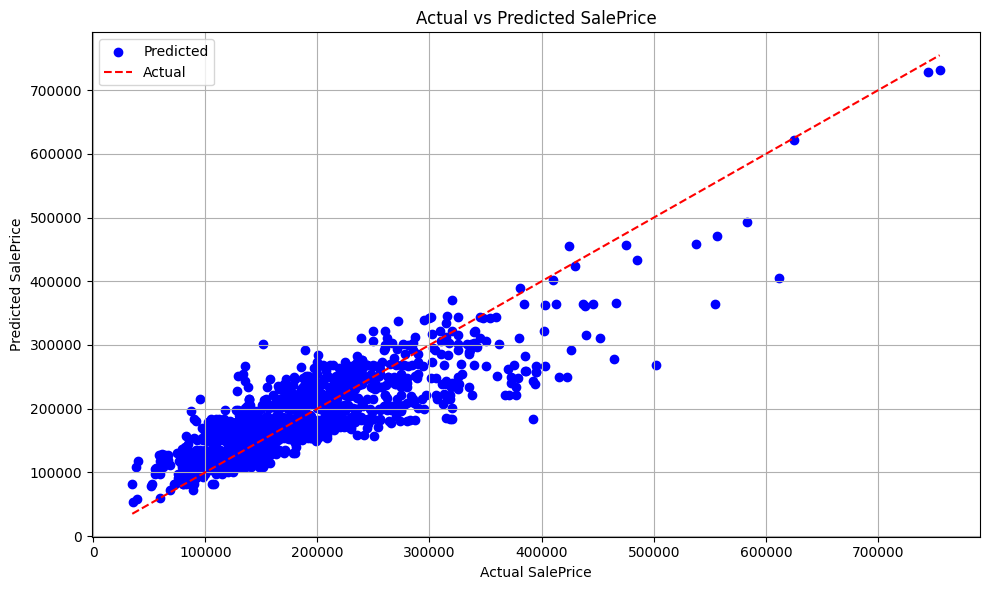

In [17]:
# Import necessary libraries for model evaluation and visualization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Separate features and target for training
X_train = train[['Area', 'TotalBathrooms', 'TotalBedrooms']]
y_train = train['SalePrice']

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the validation data
y_pred = model.predict(X_train)

y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"\nTrain RMSE: {train_rmse:.2f}")

import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, color='blue', label='Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Actual')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualizing Actual vs Predicted Sale Prices

In this cell, we create a line plot to compare the actual and predicted sale prices:

- **Plot Actual and Predicted Values**: We plot the actual sale prices and predicted sale prices as lines on the same graph. The actual sale prices are shown in red, while the predicted sale prices are shown in blue.

This visualization helps in understanding how well the model's predictions match the actual sale prices across different data points.


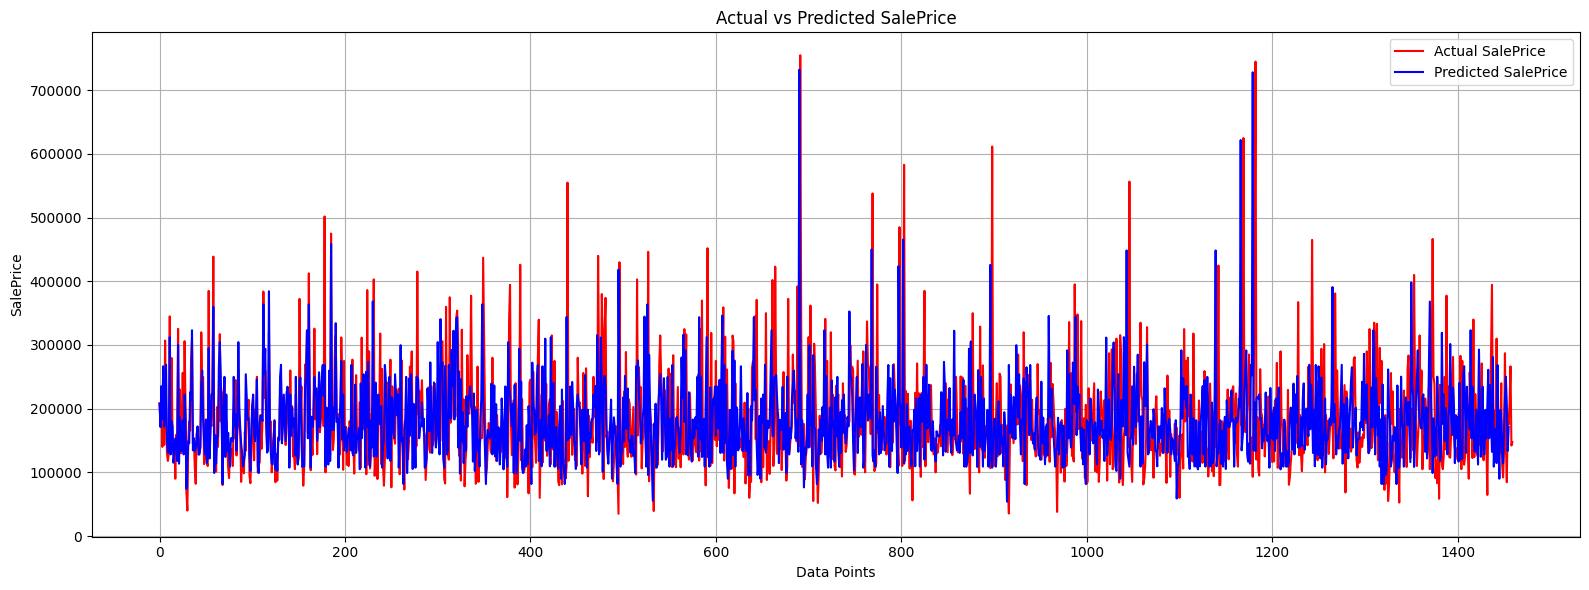

In [17]:
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are already defined
plt.figure(figsize=(16, 6))

# Plotting actual and predicted values as lines
plt.plot(y_train, color='red', label='Actual SalePrice')
plt.plot(y_train_pred, color='blue', label='Predicted SalePrice')

plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Data Points')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Saving the Trained Model

In this cell, we save the trained Gradient Boosting Regressor model to disk:

- **Model Saving**: We use the `pickle` module to serialize and save the model object. This allows us to store the model in a file (`model.h5`) and load it later without needing to retrain it.
  - **File Mode**: We open the file in write-binary mode (`'wb'`) to ensure the model is saved in the correct format.
  - **Serialization**: The `pickle.dump()` function is used to write the model to the file.

The saved model can be loaded later for predictions or further analysis without needing to retrain.


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
import pickle

# Save the model to disk
with open('model.h5', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as model.h5")


Model saved successfully as model.h5


### Loading the Model and Making Predictions

In this cell, we load the previously saved Gradient Boosting Regressor model and use it to make predictions:

- **Load the Model**: We use `pickle` to deserialize and load the saved model from the file `model.h5`. This allows us to use the trained model without retraining it.

- **Define Prediction Function**: The `predict_sale_price` function takes the area, number of bedrooms, and number of bathrooms as inputs, prepares the input data, and uses the model to predict the sale price. The prediction is returned as a float.

- **Get User Input**: We prompt the user to enter the area, number of bedrooms, and number of bathrooms for the house they want to evaluate.

- **Make and Display Prediction**: We call the `predict_sale_price` function with the user's inputs and print the predicted sale price formatted to two decimal places.

This process allows users to input house features and get an estimated sale price based on the trained model.


In [21]:
import pickle

# Load the model from disk
with open('model.h5', 'rb') as file:
    model = pickle.load(file)

def predict_sale_price(area, bedrooms, bathrooms):
    # Prepare the input data as a 2D array (since the model expects a 2D array)
    input_data = [[area, bedrooms, bathrooms]]

    # Make the prediction
    predicted_price = model.predict(input_data)

    return predicted_price[0]

# Get user input
area = float(input("Enter the area: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))

# Predict the sale price
predicted_price = predict_sale_price(area, bedrooms, bathrooms)

print(f"The predicted sale price is: ${predicted_price:.2f}")


Enter the area:  1200
Enter the number of bedrooms:  4
Enter the number of bathrooms:  2


The predicted sale price is: $168693.54
